In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import subprocess
import os
from   shapely.geometry import Point

In [2]:
# inputs
path_out = './output/'
pfafs = ['71','78'] # 71 Saskatchewan, 78 Colombia
# riv_path = '/project/def-kshook/temp/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
# cat_path = '/project/def-kshook/temp/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
# cst_path = '/project/def-kshook/temp/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes/'
riv_path = '/project/def-kshook/uofc-share/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
cat_path = '/project/def-kshook/uofc-share/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
cst_path = '/project/def-kshook/uofc-share/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes/'
riv_file_template = 'riv_pfaf_*_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
cat_file_template = 'cat_pfaf_*_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
cst_file_template = 'hillslope_*_clean.shp'

In [3]:
if not os.path.isdir(path_out):
    os.makedirs(path_out)

# Load and append the pfaf

In [4]:
riv, cat = gm.merit_read_file (pfafs,
                               riv_path,
                               riv_file_template,
                               cat_path,
                               cat_file_template,
                               path_cst = cst_path,
                               cst_file_template = cst_file_template)

/home/shg096/FHIMP/virtual_env/fhimp_venv/lib/python3.10/site-packages/geopandas/array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/home/shg096/FHIMP/virtual_env/fhimp_venv/lib/python3.10/site-packages/geopandas/array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


# prepare the network topology

In [5]:
riv, cat = gm.prepare_ntopo(riv=riv,\
                            riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                            cat=cat,\
                            cat_cols={'id':'COMID', 'hillslope':'hillslope', 'area' :'unitarea'},\
                            network = 'merit')

/home/shg096/FHIMP/virtual_env/fhimp_venv/lib/python3.10/site-packages/hydrant/topology/geom.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river['latitude'] = cat.centroid.y
/home/shg096/FHIMP/virtual_env/fhimp_venv/lib/python3.10/site-packages/hydrant/topology/geom.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river['longitude'] = cat.centroid.x


# Example-1 From Fraser River

In [6]:
# set the case name
prefix = 'Fraser_merit_'

In [7]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.subset_ntopo(cat=cat,\
                                       cat_cols={'id':'COMID'},\
                                       riv=riv,\
                                       riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                       outlet_id=[78011886]) # segment that is aimed to make the subbasin for


<AxesSubplot:>

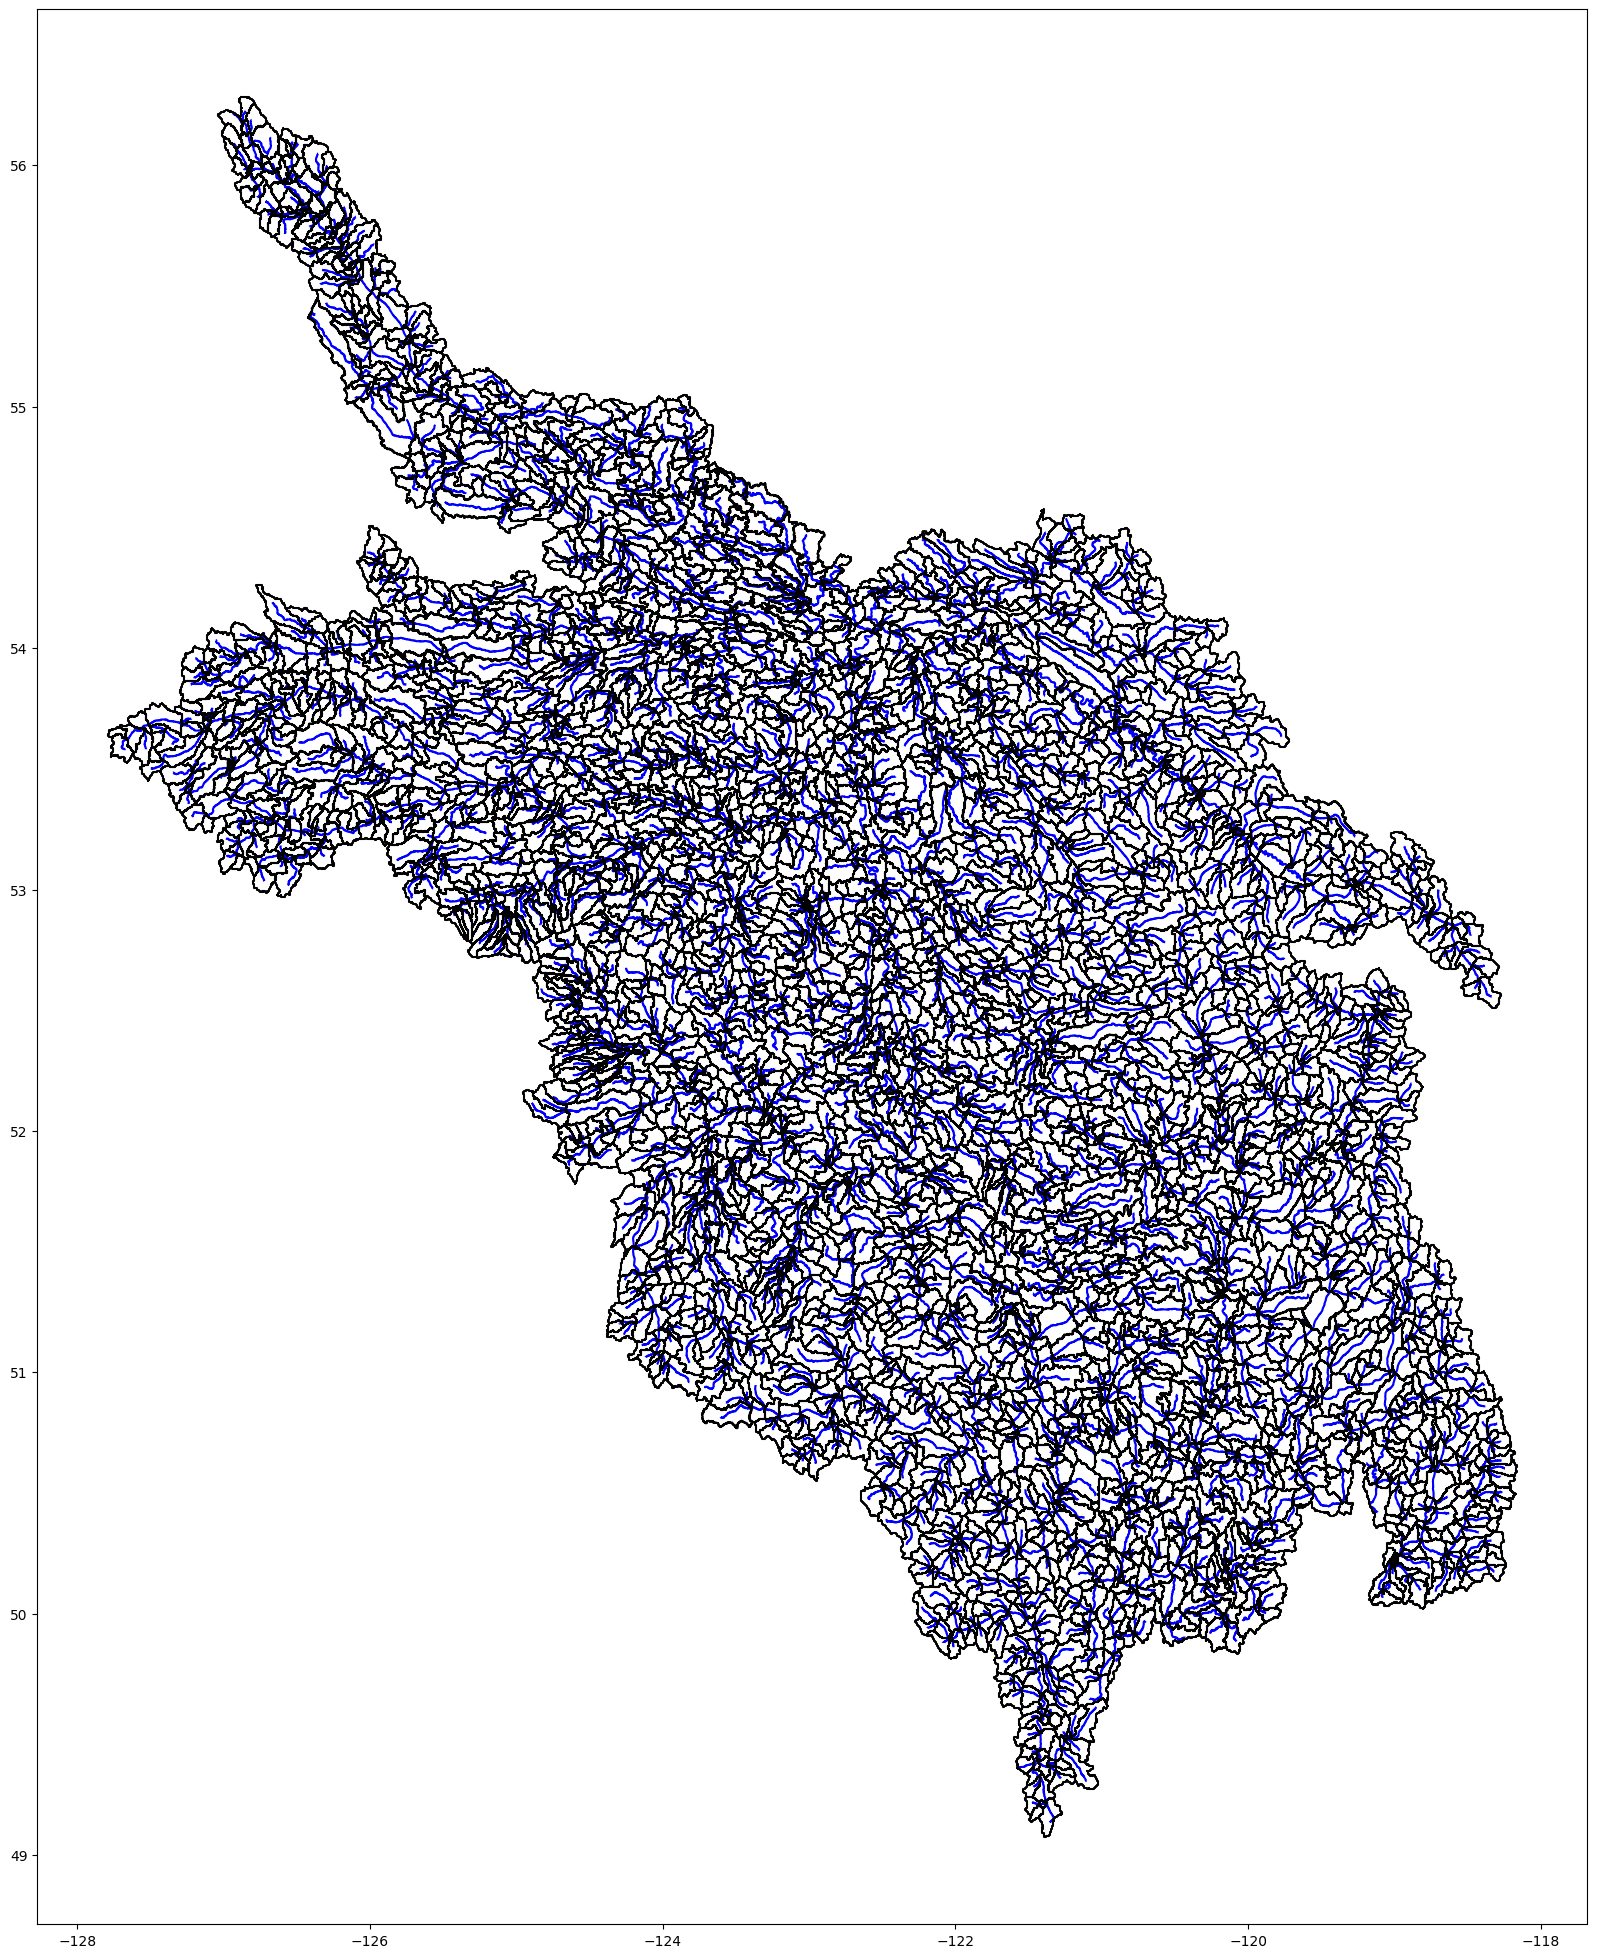

In [8]:
fig, ax = plt.subplots(figsize=(20,30))
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')

In [9]:
xr_ntopo = gm.create_xr_ntopo(riv_slice,
                              cat_slice,
                              network = 'merit')
xr_ntopo

<xarray.Dataset>
Dimensions:     (n: 4554)
Coordinates:
  * n           (n) int64 0 1 2 3 4 5 6 7 ... 4547 4548 4549 4550 4551 4552 4553
Data variables: (12/22)
    COMID       (n) int64 78002549 78002559 78002618 ... 78012456 78011886
    length      (n) float64 892.7 3.696e+03 8.147e+03 ... 8.262e+03 9.603e+03
    lengthdir   (n) float64 0.6276 3.425 6.077 5.307 ... 5.673 3.063 5.719 8.264
    sinuosity   (n) float64 1.422 1.079 1.341 1.235 ... 1.244 1.248 1.444 1.162
    slope       (n) float64 0.01643 0.02323 0.01401 ... 0.03047 0.0003948
    uparea      (n) float64 2.769e+07 5.325e+07 ... 3.215e+08 2.172e+11
    ...          ...
    unitarea    (n) float64 2.769e+07 5.325e+07 ... 3.241e+07 4.993e+07
    latitude    (n) float64 56.07 56.12 56.18 56.24 ... 49.28 49.39 49.33 49.38
    longitude   (n) float64 -127.0 -126.9 -126.9 -126.8 ... -121.5 -121.5 -121.5
    width       (n) float64 6.262 8.297 8.842 7.56 ... 7.288 466.6 18.93 467.0
    Rank        (n) int64 1 2 3 4 5 6 7 8 ... 4548 4549 4550 4551 4552 4553 4554
    Rank_Next   (n) int64 5 5 9 9 11 11 12 ... 4552 4552 4553 4553 4554 4554 0

## save

In [10]:
cat_slice.to_file(path_out+prefix+'cat.shp')
riv_slice.to_file(path_out+prefix+'riv.shp')
xr_ntopo.to_netcdf(path_out+prefix+'ntopo.nc')

# Example-2 From basins of identified pfafs that intersect with Alberta and Saskatchewan

In [11]:
# set the case name
prefix = 'ALSASK_merit_'

In [12]:
# load the info and the provience
trg_shp = gpd.read_file('./data/province/provinces.shp')
sel_pr = ['Alberta','Saskatchewan']
# subsetting `provinces` variable
trg_provinces = trg_shp.loc[trg_shp.PRENAME.isin(sel_pr)].copy().to_crs(epsg=4326)

In [13]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.subset_ntopo(cat=cat,\
                                       cat_cols={'id':'COMID'},\
                                       riv=riv,\
                                       riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                       shapefile=trg_provinces)

<AxesSubplot:>

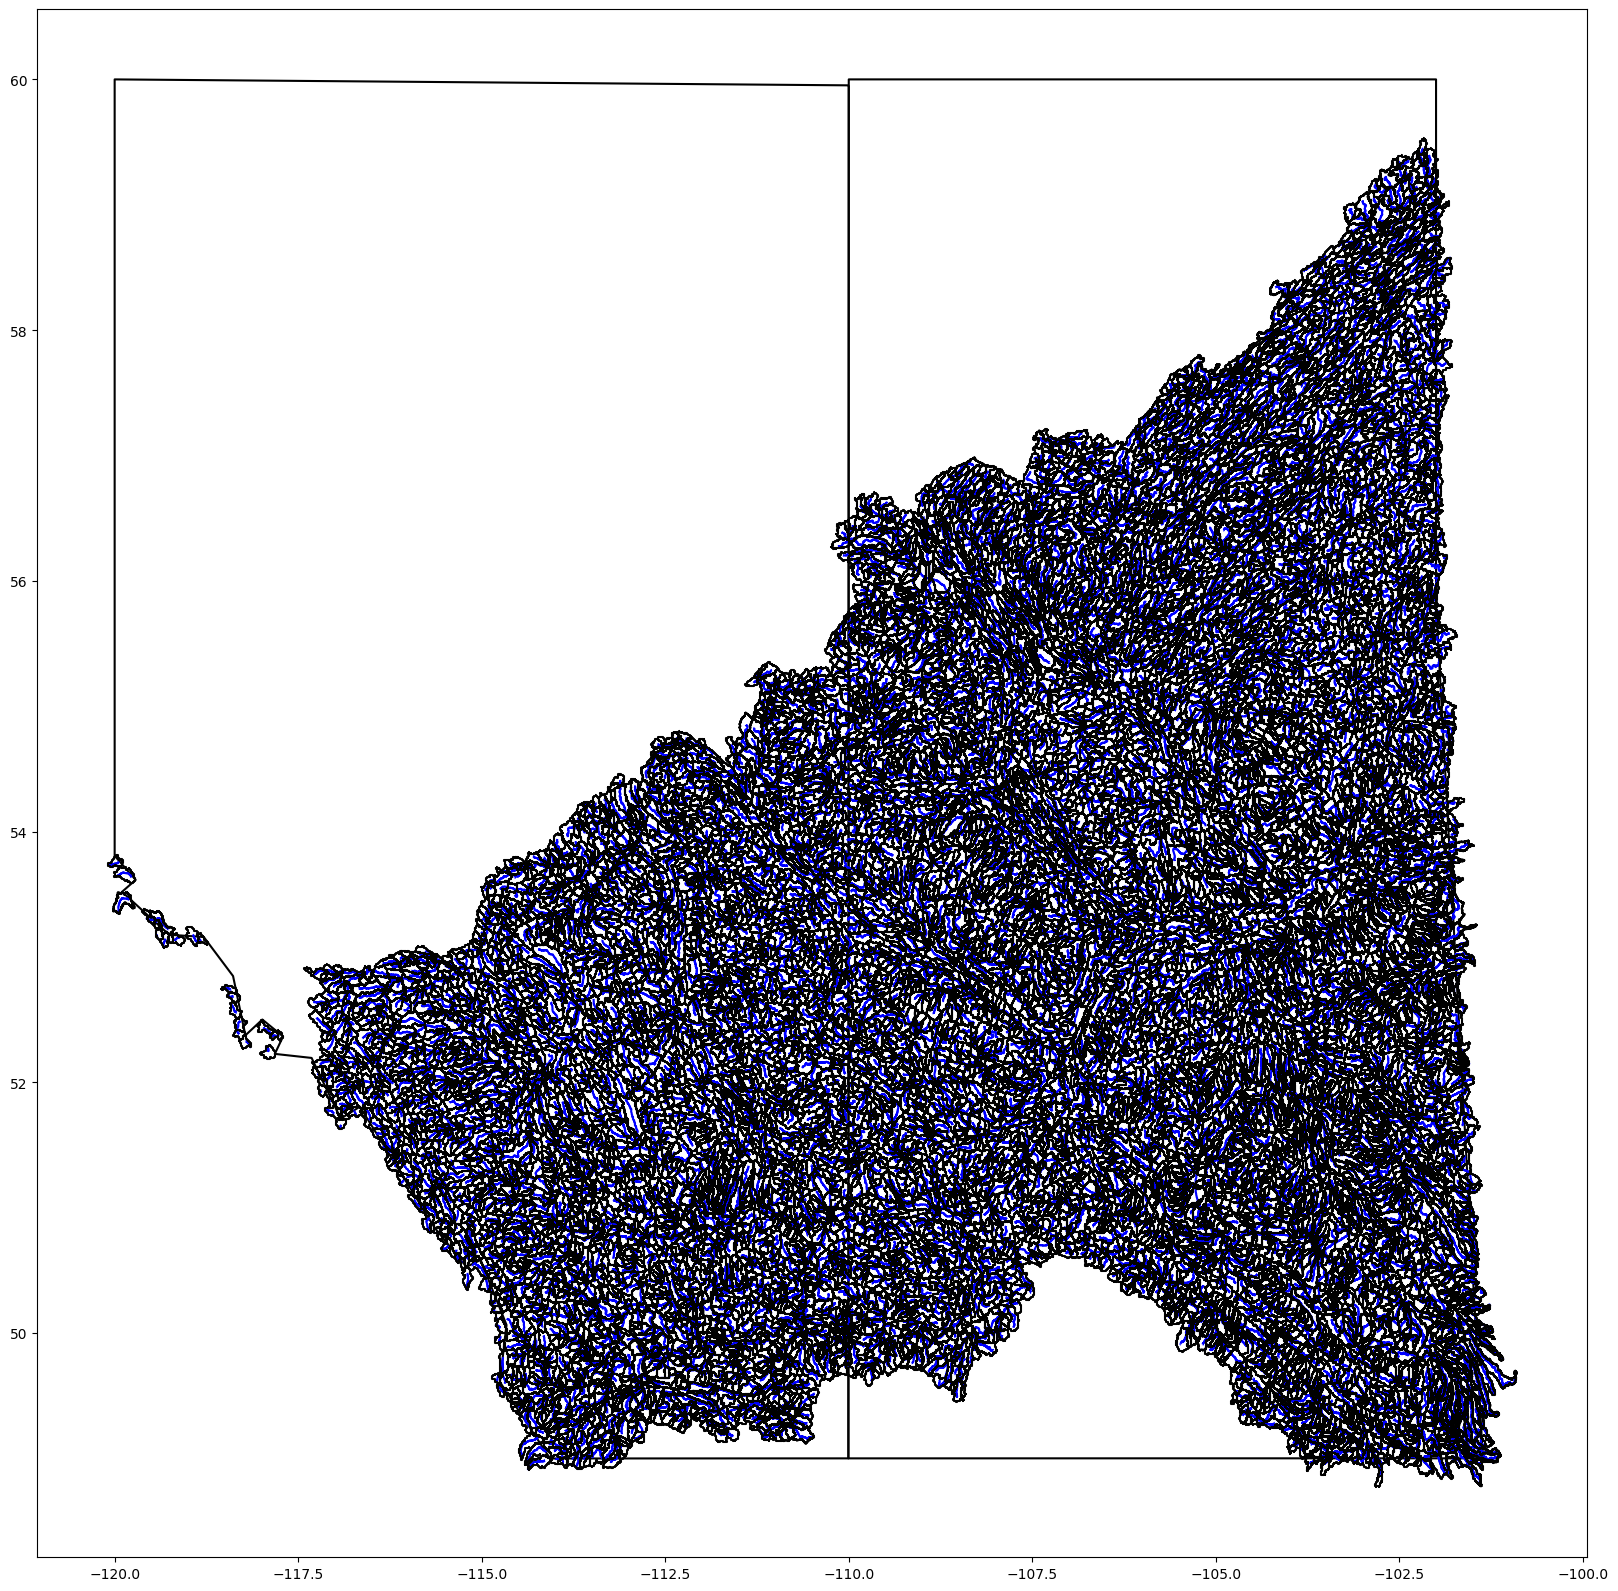

In [14]:
fig, ax = plt.subplots(figsize=(20,30))
trg_provinces.boundary.plot(ax=ax, color='k')
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')

In [15]:
xr_ntopo = gm.create_xr_ntopo(riv_slice,
                              cat_slice,
                              network = 'merit')
xr_ntopo

<xarray.Dataset>
Dimensions:     (n: 16117)
Coordinates:
  * n           (n) int64 0 1 2 3 4 5 6 ... 16111 16112 16113 16114 16115 16116
Data variables: (12/22)
    COMID       (n) int64 78006070 78006117 78008581 ... 71050687 71016265
    length      (n) float64 2.12e+04 3.753e+03 2.279e+04 ... 1.0 1.0 2.088e+04
    lengthdir   (n) float64 15.12 3.435 15.09 0.7111 ... 13.21 0.001 0.001 14.05
    sinuosity   (n) float64 1.402 1.093 1.51 1.03 ... 1.536 0.001 0.001 1.486
    slope       (n) float64 0.02638 0.108 0.02646 ... 0.001 0.001 3.823e-05
    uparea      (n) float64 1.491e+08 3.463e+07 ... 1.197e+07 3.249e+11
    ...          ...
    unitarea    (n) float64 1.491e+08 3.463e+07 ... 1.197e+07 1.462e+07
    latitude    (n) float64 53.27 53.26 50.96 51.06 ... 49.56 52.72 52.05 53.88
    longitude   (n) float64 -119.4 -119.4 -115.7 -115.8 ... -108.5 -110.4 -101.8
    width       (n) float64 13.21 6.885 11.32 6.104 ... 12.97 4.288 4.46 571.0
    Rank        (n) int64 1 2 3 4 5 6 7 ... 16112 16113 16114 16115 16116 16117
    Rank_Next   (n) int64 15836 15836 5 5 15842 15842 15850 ... 0 0 0 0 0 0 0

In [16]:
cat_slice.to_file(path_out+prefix+'cat.shp')
riv_slice.to_file(path_out+prefix+'riv.shp')
xr_ntopo.to_netcdf(path_out+prefix+'ntopo.nc')

# Example-3 From basins of identified pfafs that intersect with target stations in Alberta

In [17]:
# set the case name
prefix = 'stations_merit_'

In [18]:
data = {
    'Station ID': ['05BE004', '05BH004', '05BL004', '05CC002'],
    'seg ID': [71028039, 71027942, 71034975, 71022153],
    'Station name': [
        'BOW RIVER NEAR SEEBE',
        'BOW RIVER AT CALGARY',
        'HIGHWOOD RIVER BELOW LITTLE BOW CANAL',
        'RED DEER RIVER AT RED DEER'
    ],
    'up': [0, 0, 0, 0],
    'X': [-115.03,-114.05,-113.86,-113.82],
    'Y': [51.11,    51.05,  50.58,  52.27]
}

# Create a DataFrame from the dictionary
stations_seg_id = pd.DataFrame(data)

# Create a points from the dictionary
geometry = [Point(xy) for xy in zip(data['X'], data['Y'])]
stations_points = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

In [19]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.subset_ntopo(cat=cat,\
                                       cat_cols={'id':'COMID'},\
                                       riv=riv,\
                                       riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                       outlet_id=list(stations_seg_id['seg ID']))



<AxesSubplot:>

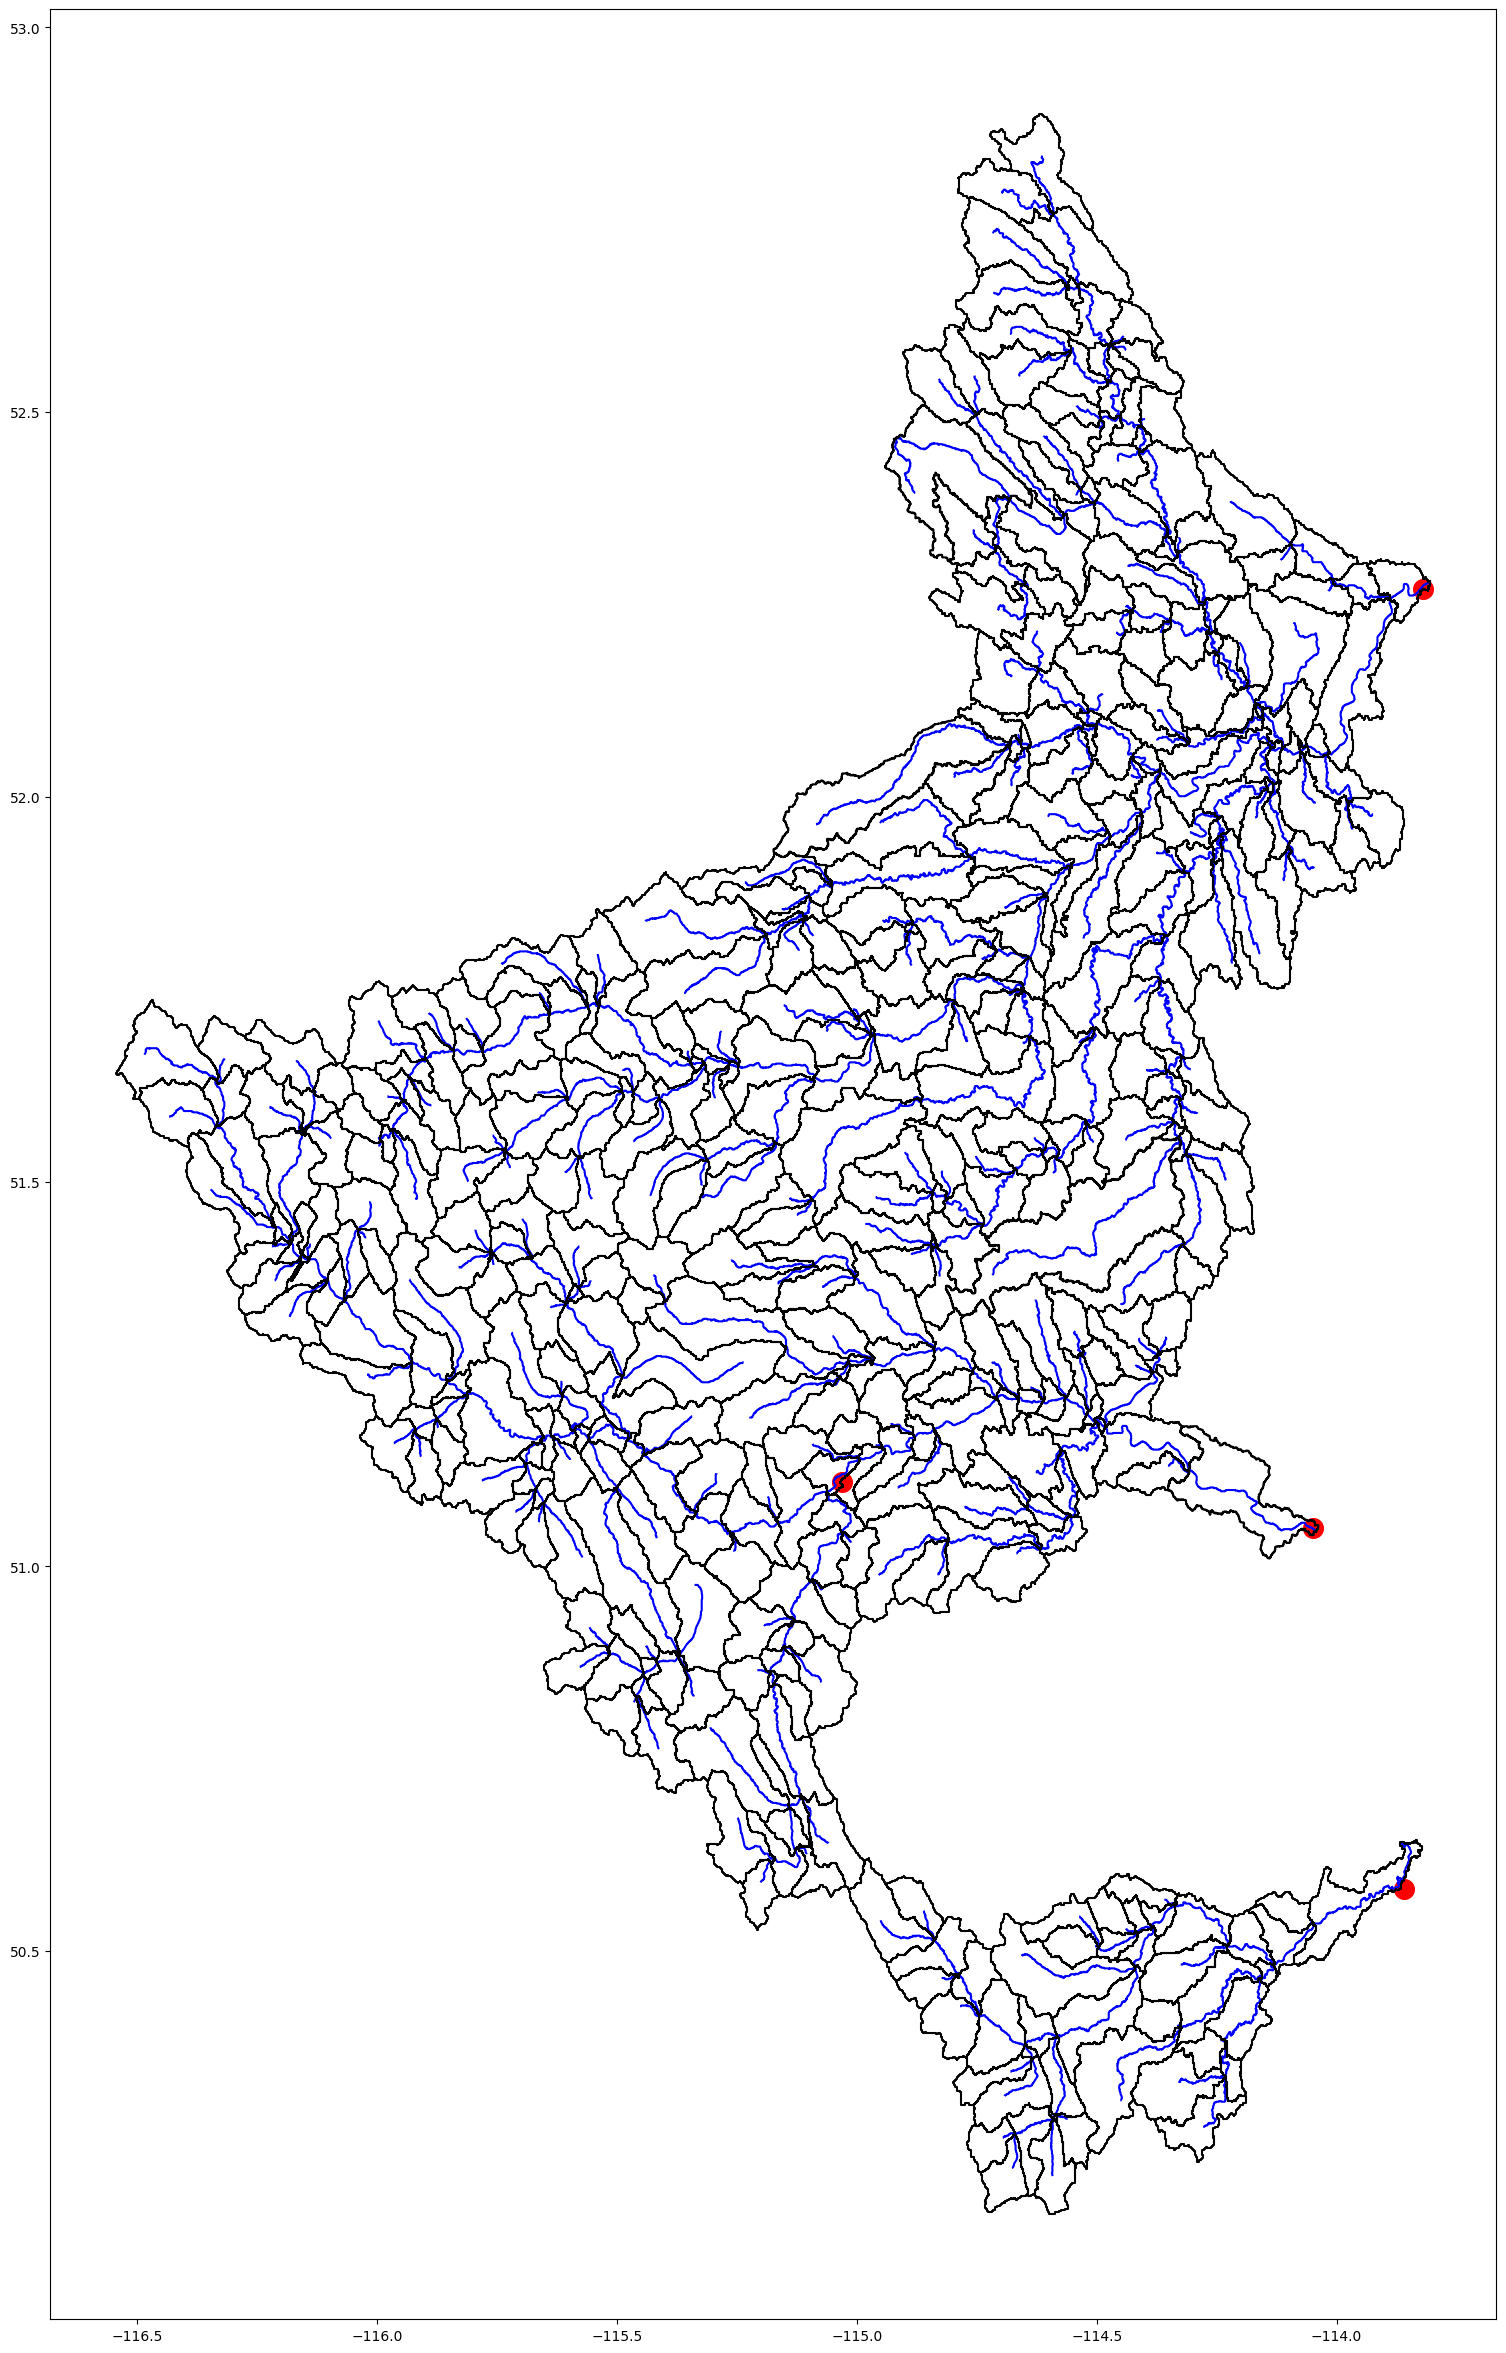

In [20]:
fig, ax = plt.subplots(figsize=(20,30))
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')
stations_points.plot(ax=ax, color='r', markersize=200)


In [21]:
xr_ntopo = gm.create_xr_ntopo(riv_slice,
                              cat_slice,
                              network = 'merit')
xr_ntopo

<xarray.Dataset>
Dimensions:     (n: 453)
Coordinates:
  * n           (n) int64 0 1 2 3 4 5 6 7 8 ... 445 446 447 448 449 450 451 452
Data variables: (12/22)
    COMID       (n) int64 71032073 71032106 71030390 ... 71034975 71027942
    length      (n) float64 1.089e+03 442.6 3.67e+03 ... 3.246e+04 2.815e+04
    lengthdir   (n) float64 0.8652 0.4003 2.425 10.62 ... 6.073 17.13 20.59
    sinuosity   (n) float64 1.259 1.106 1.514 1.215 ... 1.775 1.589 1.895 1.367
    slope       (n) float64 0.04383 0.004286 0.01733 ... 0.002011 0.001798
    uparea      (n) float64 3.682e+07 2.581e+07 ... 1.974e+09 7.857e+09
    ...          ...
    unitarea    (n) float64 3.682e+07 2.581e+07 ... 9.765e+07 1.531e+08
    latitude    (n) float64 51.53 51.58 51.55 51.49 ... 51.12 52.28 50.56 51.1
    longitude   (n) float64 -116.0 -116.0 -116.0 -115.9 ... -113.9 -114.0 -114.2
    width       (n) float64 7.068 6.08 9.443 9.064 ... 6.907 109.3 45.43 89.64
    Rank        (n) int64 1 2 3 4 5 6 7 8 9 ... 446 447 448 449 450 451 452 453
    Rank_Next   (n) int64 3 3 5 5 7 7 9 9 11 ... 448 448 449 449 453 453 0 0 0

In [22]:
cat_slice.to_file(path_out+prefix+'cat.shp')
riv_slice.to_file(path_out+prefix+'riv.shp')
xr_ntopo.to_netcdf(path_out+prefix+'ntopo.nc')